# E-commerce Data Analysis Practice Notebook

This notebook contains 30 data analysis questions to help you improve your pandas and exploratory data analysis (EDA) skills.
The dataset includes customer, order, product, payment, shipping, and review details.

You can use the Brazilian Olist dataset or a similar e-commerce dataset with the following columns:

```python
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
 'customer_city', 'customer_state', 'order_id', 'order_status',
 'order_purchase_timestamp', 'order_approved_at',
 'order_delivered_carrier_date', 'order_delivered_customer_date',
 'order_estimated_delivery_date', 'review_id', 'review_score',
 'review_comment_title', 'review_comment_message',
 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
 'payment_type', 'payment_installments', 'payment_value',
 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
 'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
 'seller_state', 'product_category_name', 'product_name_lenght',
 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
 'product_length_cm', 'product_height_cm', 'product_width_cm']
```

---


In [1]:
from IPython.display import HTML

HTML('<img src="https://www.besmartee.com/wp-content/uploads/2022/12/6-Real-Mortgage-Use-Cases-of-Automation-To-Save-Money_BlogSpot.png" width="800">')



In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
from IPython.display import HTML

HTML('<h1 style="color: purple; font-weight: bold;">Loading the Dataset</h1>')

In [4]:
import pandas as pd

# Step 1: Load each CSV into separate DataFrames in order
df1 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
df2 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
df3 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df4 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df5 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
df6 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df7 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df8 = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
df9 = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

In [5]:
from IPython.display import HTML

HTML('<h1 style="color: lightgreen; font-weight: bold;">About Dataset and its purpose</h1>')

This dataset is a real e-commerce dataset collected from Olist, a large Brazilian marketplace. It contains detailed records of:

Customers

Orders

Payments

Shipping info

Products and categories

Reviews

Seller and location data

✅ Purpose:

It’s mainly used for data analysis, visualization, and building machine learning models like:

Predicting delivery time

Sentiment analysis on reviews

Recommender systems

In [6]:
from IPython.display import HTML

HTML('<img src="https://media.licdn.com/dms/image/D4D12AQHyiNywQQTHYQ/article-cover_image-shrink_720_1280/0/1713730414746?e=2147483647&v=beta&t=xWD0ReEH0rib5DLVnPmYa4zHdJBOLHjzJMPgeWNel9M" width="800">')

### Q1. Are there any missing values in the dataset? Which columns have the most missing data?

In [7]:
# Your code here
from IPython.display import HTML

HTML('<h1 style="color: orange; font-weight: bold;">Dataframes having missing values</h1>')

In [8]:
# Your code here
diction1 = {
    'df11': df1,
    'df22': df2,
    'df33': df3,
    'df44': df4,
    'df55': df5,
    'df66': df6,
    'df77': df7,
    'df88': df8,
    'df99': df9
}
for i, j in diction1.items():
    missing = j.isnull().sum()
    if (missing != 0).any():
      print(i,'\n',missing)

df55 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
df66 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
df77 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


### **df5 – Order Reviews Dataset**
This dataset contains user-generated reviews. A large number of rows have missing values in **`review_comment_title`** (87,656) and **`review_comment_message`** (58,247), which suggests that while users often provide a rating, they do not always leave a comment or title. Other fields like `review_id`, `order_id`, and timestamps are fully populated.

---

### **df6 – Orders Dataset**
This dataset holds order timeline details. Missing values are found in **`order_approved_at`** (160), **`order_delivered_carrier_date`** (1,783), and **`order_delivered_customer_date`** (2,965). These may indicate delayed, in-process, or canceled orders. The rest of the columns are complete, including the `order_estimated_delivery_date`.

---

### **df7 – Products Dataset**
The product dataset has 610 missing entries for **`product_category_name`**, as well as related features like name length, description length, and photo quantity. This suggests these products lack complete catalog information. Only 2 rows are missing physical measurements such as **`product_weight_g`**, **`product_length_cm`**, **`product_height_cm`**, and **`product_width_cm`**, showing the rest of the products are well-documented.

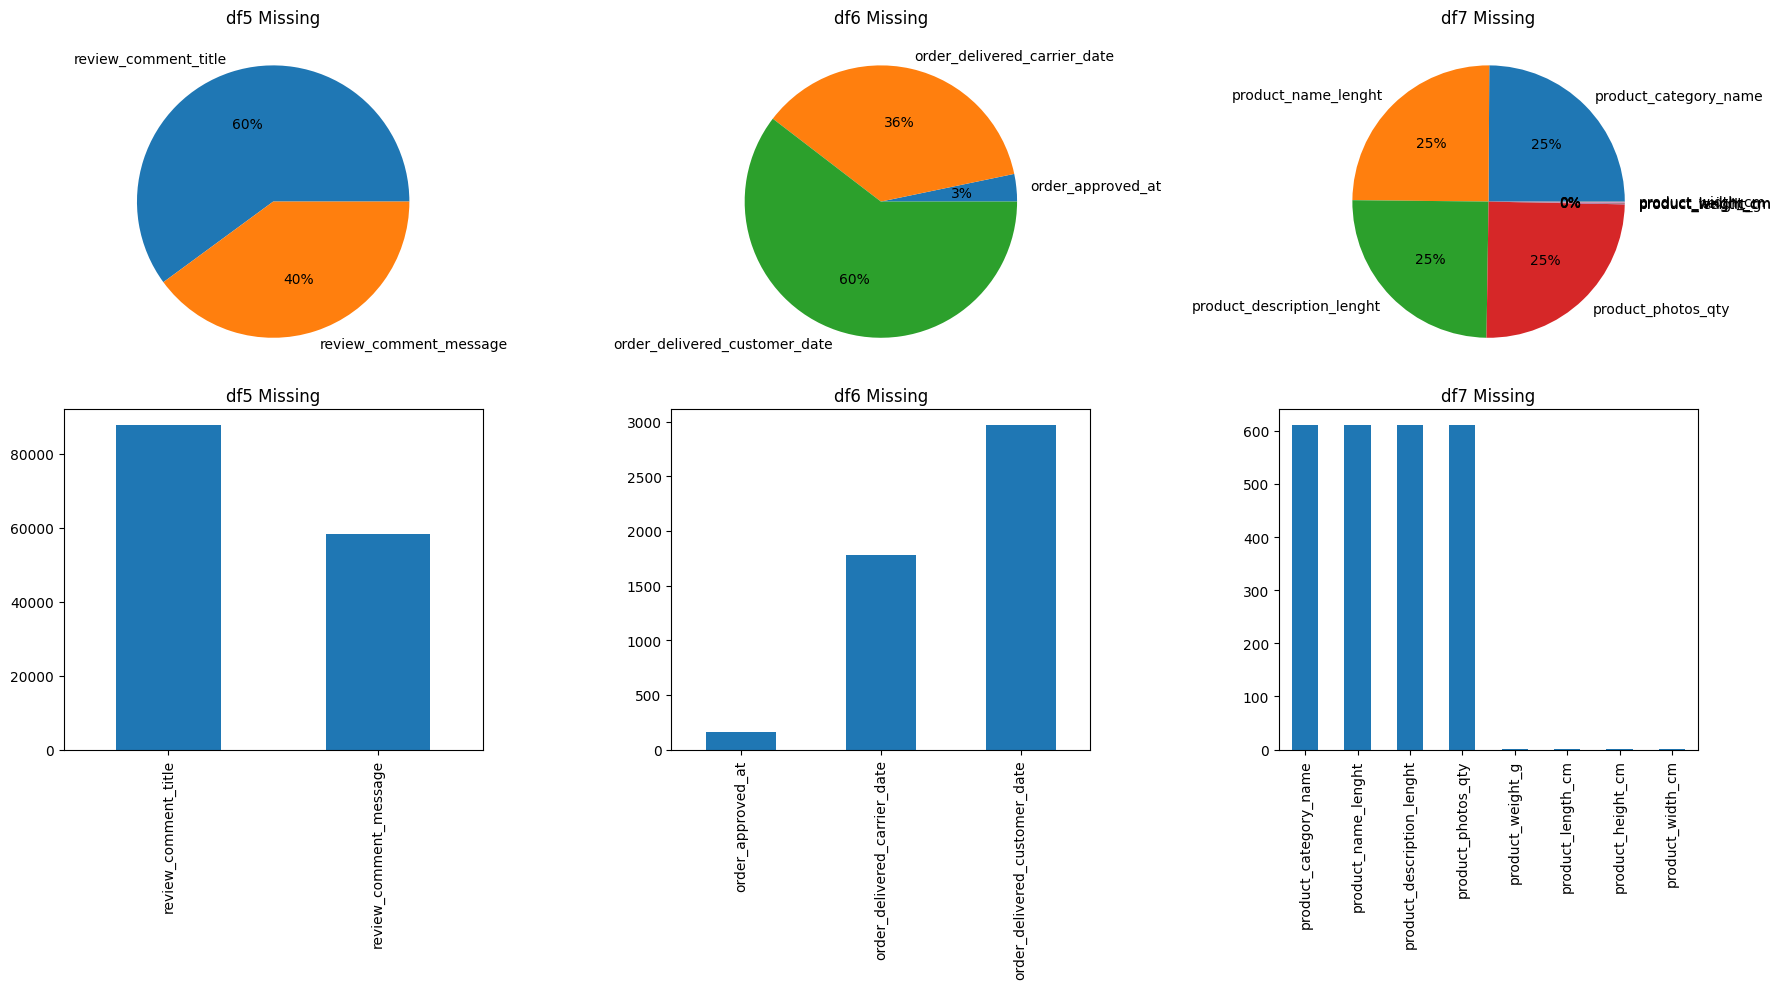

In [9]:
# Your code here
import matplotlib.pyplot as plt
import pandas as pd

# Calculate missing values (only columns with missing data)
missing5 = df5.isnull().sum()
missing5 = missing5[missing5 > 0]

missing6 = df6.isnull().sum()
missing6 = missing6[missing6 > 0]

missing7 = df7.isnull().sum()
missing7 = missing7[missing7 > 0]

# Plot Pie and Bar Charts
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Pie charts (top row)
missing5.plot.pie(ax=axs[0, 0], title='df5 Missing', autopct='%1.0f%%')
axs[0, 0].set_ylabel('')

missing6.plot.pie(ax=axs[0, 1], title='df6 Missing', autopct='%1.0f%%')
axs[0, 1].set_ylabel('')

missing7.plot.pie(ax=axs[0, 2], title='df7 Missing', autopct='%1.0f%%')
axs[0, 2].set_ylabel('')

# Bar charts (bottom row)
missing5.plot.bar(ax=axs[1, 0], title='df5 Missing')
missing6.plot.bar(ax=axs[1, 1], title='df6 Missing')
missing7.plot.bar(ax=axs[1, 2], title='df7 Missing')

plt.tight_layout()
plt.show()


In [10]:
from IPython.display import HTML

HTML('<h1 style="color: orange; font-weight: bold;">Dataframe having no Missing value</h1>')

In [11]:
for i, j in diction1.items():
    missing = j.isnull().sum()
    if (missing == 0).all():
      print(i)

df11
df22
df33
df44
df88
df99


In [12]:
from IPython.display import HTML

HTML('<h1 style="color: green; font-weight: bold;">Merged Dataframe</h1>')

In [13]:
# Step-by-step merging all DataFrames into final_dataset
df1_df6 = pd.merge(df1, df6, on="customer_id")
df1_df5_df6 = pd.merge(df1_df6, df5, on="order_id")
df1_df5_df6_df4 = pd.merge(df1_df5_df6, df4, on="order_id")
df1_df5_df6_df4_df3 = pd.merge(df1_df5_df6_df4, df3, on="order_id")
df1_df5_df6_df4_df3_df8 = pd.merge(df1_df5_df6_df4_df3, df8, on="seller_id")
fn_df = pd.merge(df1_df5_df6_df4_df3_df8, df7, on="product_id")
df = pd.merge(fn_df, df9, on="product_category_name")

In [14]:
from IPython.display import HTML

HTML('<h1 style="color: grey; font-weight: bold;">Missing values</h1>')

In [15]:
df.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


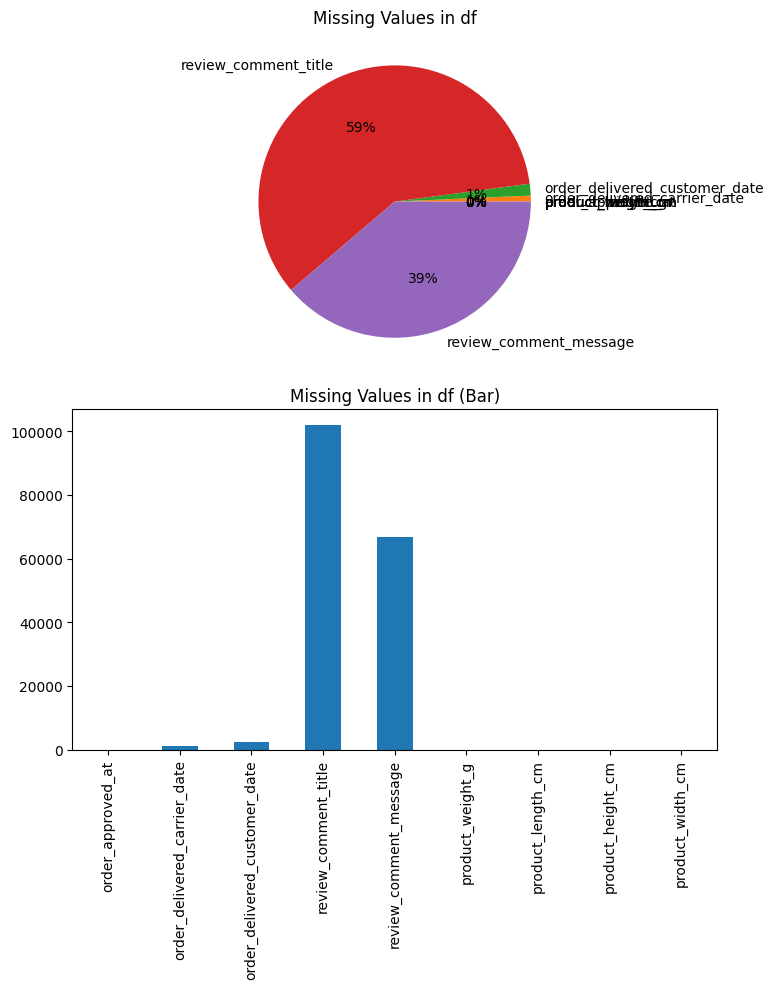

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

missing = df.isnull().sum()
missing = missing[missing > 0]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Pie chart
missing.plot.pie(ax=axs[0], autopct='%1.0f%%', title='Missing Values in df')

# Bar chart
missing.plot.bar(ax=axs[1], title='Missing Values in df (Bar)')

plt.tight_layout()
plt.show()



### Q2. Convert all date/time columns to datetime objects — how many columns needed this conversion?

In [17]:
from IPython.display import HTML

HTML('<h1 style="color: orange; font-weight: bold;">date/time columns to datetime objects</h1>')

#Explanation
I used pd.to_datetime() to convert all date columns to proper datetime format.

In [18]:
# Your code here
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

### Q3. Check for duplicated rows — how many duplicates exist?

In [19]:
# Your code here
from IPython.display import HTML

HTML('<h1 style="color: green; font-weight: bold;">duplicated Rows</h1>')


In [20]:
# Your code here
df.duplicated().sum()

0

### Q4. Are there any invalid entries in categorical columns like `payment_type`, `order_status`, etc.?

In [21]:
# Your code here
from IPython.display import HTML

HTML('<h1 style="color: blue; font-weight: bold;">Catagorical columns</h1>')

In [22]:
categorical_columns = df.select_dtypes(include='object')

for i in categorical_columns.columns:
    if df[i].nunique() <= 50:
        print(f"\nColumn: {i}")
        print(df[i].unique())


Column: customer_state
['SP' 'SC' 'PR' 'MG' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']

Column: order_status
['delivered' 'invoiced' 'shipped' 'processing' 'canceled' 'unavailable'
 'approved']

Column: payment_type
['credit_card' 'debit_card' 'boleto' 'voucher']

Column: seller_state
['SP' 'SC' 'RJ' 'PR' 'MG' 'ES' 'RS' 'DF' 'PE' 'MA' 'BA' 'GO' 'MT' 'MS'
 'RO' 'PB' 'CE' 'PA' 'RN' 'PI' 'SE' 'AC' 'AM']


# Explaination
I selected all the categorical columns by checking for columns with the data type 'object'.
Then, I filtered only those columns that have 50 or fewer unique values, because I want to focus on pure categorical columns — and avoid mixed data types or high-cardinality features like IDs or free text.


In [23]:
from IPython.display import HTML

HTML('<h1 style="color: pink; font-weight: bold;">cheacking the invalid values</h1>')

In [24]:
for i in categorical_columns.columns:
    if df[i].nunique() <= 50:
        print(f"\nColumn: {i}")
        print(df[i].value_counts())


Column: customer_state
customer_state
SP    48797
RJ    14987
MG    13429
RS     6413
PR     5879
SC     4218
BA     3942
DF     2449
GO     2359
ES     2300
PE     1851
CE     1527
MT     1106
PA     1081
MS      845
MA      832
PB      619
PI      561
RN      560
AL      455
SE      393
TO      333
RO      279
AM      168
AC       93
AP       83
RR       50
Name: count, dtype: int64

Column: order_status
order_status
delivered      113210
shipped          1138
canceled          536
invoiced          358
processing        357
unavailable         7
approved            3
Name: count, dtype: int64

Column: payment_type
payment_type
credit_card    85278
boleto         22510
voucher         6162
debit_card      1659
Name: count, dtype: int64

Column: seller_state
seller_state
SP    82417
MG     9014
PR     8964
RJ     4906
SC     4221
RS     2224
DF      937
BA      698
GO      537
PE      461
MA      403
ES      374
MT      147
CE      103
MS       59
RN       56
PB       40
RO       14


In [25]:
from IPython.display import HTML

HTML('<h1 style="color: red; font-weight: bold;">Potentially invalid or less useful due to low frequency</h1>')

In the order_status column, values like unavailable and approved appear very few times, which suggests they may be invalid or not useful. Similarly, in columns like customer_state and seller_state, values such as AC, AM, AP, and RR have extremely low frequency, meaning they might not contribute much to analysis. Since categories that cover at least 5% of the data are generally considered useful, these rare entries (below 1–2%) are likely not helpful for modeling.

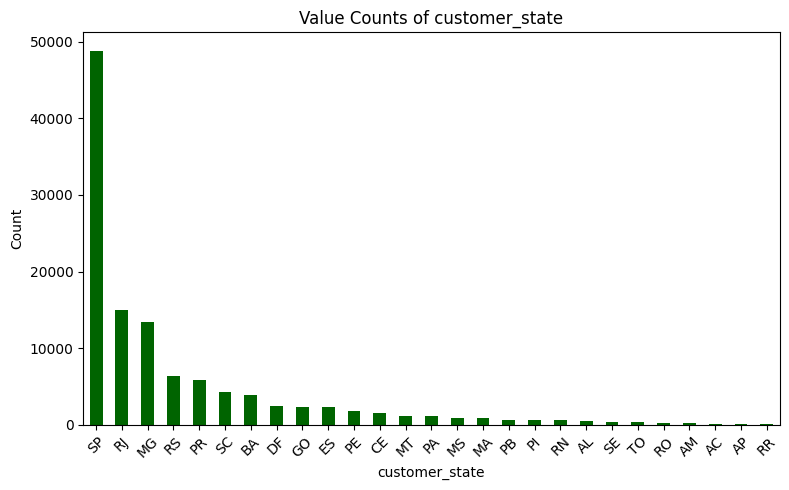

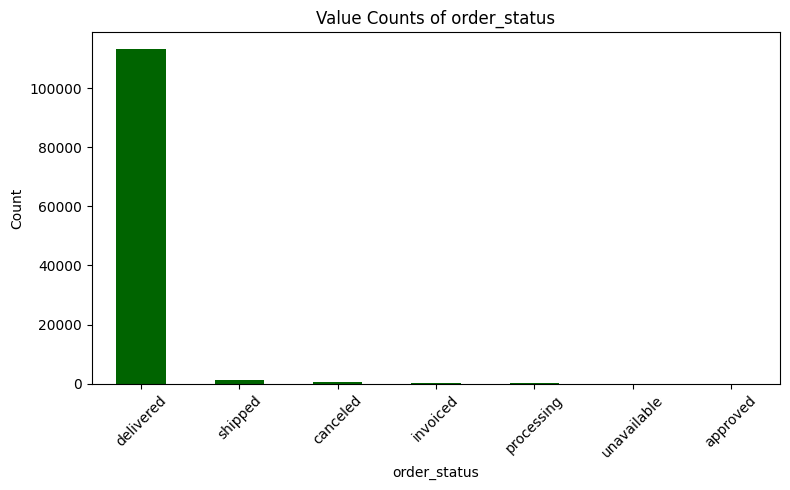

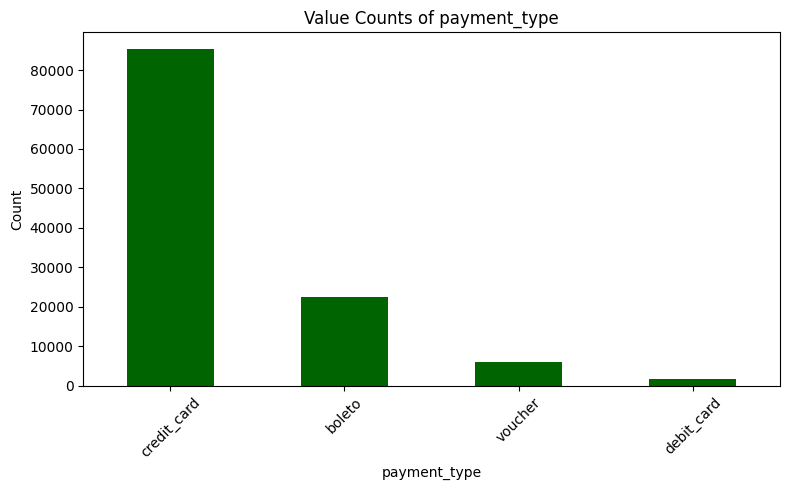

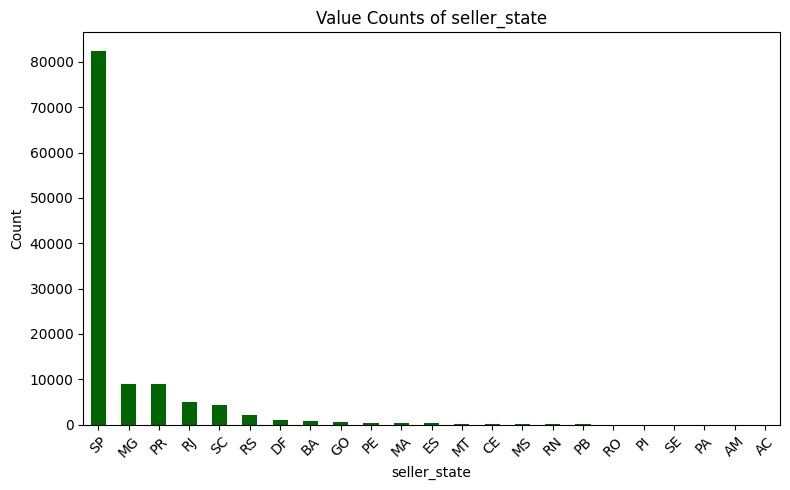

In [26]:
for col in categorical_columns.columns:
    if df[col].nunique() <= 50:
        plt.figure(figsize=(8, 5))
        df[col].value_counts().plot(kind='bar', color='darkgreen')
        plt.title(f'Value Counts of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### Q5. Are all numeric columns correctly typed? E.g., prices as float, quantities as int?

In [27]:
# Your code here
from IPython.display import HTML

HTML('<img src="https://python-hub.com/wp-content/uploads/2023/08/2-Types-of-Type-Conversion-In-Python-With-Example.webp" width="800">')

In [28]:
from IPython.display import HTML

HTML('<h1 style="color: orange; font-weight: bold;">Numerical columns and float Conversion</h1>')

In [29]:
# Your code here
numerical_column=df.select_dtypes(include=int)
numerical_column.columns

Index(['customer_zip_code_prefix', 'review_score', 'payment_sequential',
       'payment_installments', 'order_item_id', 'seller_zip_code_prefix'],
      dtype='object')

In [30]:
# Your code here
df.select_dtypes(include=float)

,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,146.87,124.99,21.88,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,335.48,289.00,46.48,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,157.73,139.94,17.79,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,173.30,149.94,23.36,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,252.25,230.00,22.25,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...
115604,88.78,74.90,13.88,51.0,489.0,2.0,611.0,22.0,22.0,23.0
115605,129.06,114.90,14.16,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
115606,56.04,37.00,19.04,60.0,575.0,1.0,870.0,25.0,20.0,18.0
115607,711.07,689.00,22.07,59.0,452.0,1.0,710.0,19.0,13.0,14.0


In [31]:
for i in df.select_dtypes(include=float).columns:
  if (df[i]%1==0).all():
    df[i]=df[i].astype(int)

In [32]:
df.select_dtypes(include=float)

,payment_value,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,146.87,124.99,21.88,8683.0,54.0,64.0,31.0
1,335.48,289.00,46.48,10150.0,89.0,15.0,40.0
2,157.73,139.94,17.79,8267.0,52.0,52.0,17.0
3,173.30,149.94,23.36,12160.0,56.0,51.0,28.0
4,252.25,230.00,22.25,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...
115604,88.78,74.90,13.88,611.0,22.0,22.0,23.0
115605,129.06,114.90,14.16,1211.0,25.0,24.0,22.0
115606,56.04,37.00,19.04,870.0,25.0,20.0,18.0
115607,711.07,689.00,22.07,710.0,19.0,13.0,14.0


By examining numeric columns (ints and floats) and converting floats with integer-only values to ints, i ensured that variables like prices or quantities are typed properly

### Q6. What are the top 5 cities with the most customers?

In [33]:
from IPython.display import HTML

HTML('<h1 style="color: purple; font-weight: bold;">top 5 cities with the most customers</h1>')

# Expalanation
Grouping by customer_city, counting unique customer_id, and plotting the top 5 cities via a Matplotlib bar chart highlighted which geographical areas have the highest customer density.

In [34]:
# Your code here
top_cities = df.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False).head(5)

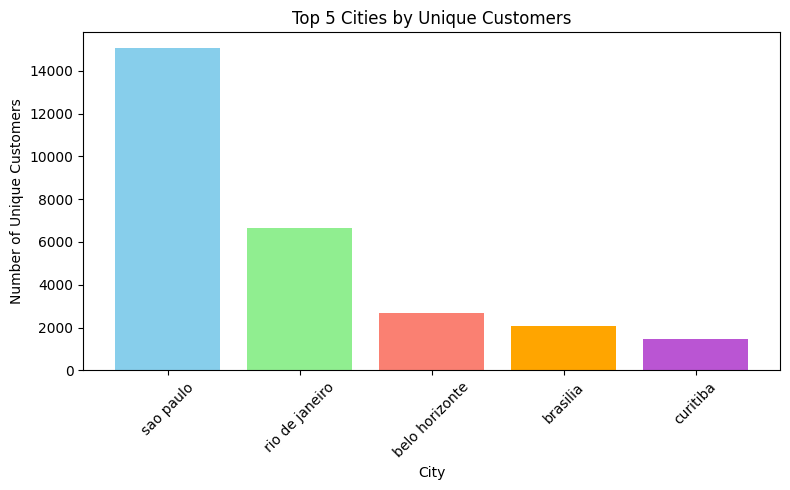

In [35]:
# Your code here
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'mediumorchid']

plt.figure(figsize=(8, 5))
plt.bar(top_cities.index, top_cities.values, color=colors)
plt.title('Top 5 Cities by Unique Customers')
plt.xlabel('City')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q7. What are the top 5 cities with the most sellers?

In [36]:
HTML('<h1 style="color: purple; font-weight: bold;">Top 5 cities with the most Sellers</h1>')# Your code here

# Expalanation
Similarly, grouping by seller_city, counting unique seller_id, and visualizing the top 5 cities through a bar chart showed where most sellers are located.

In [37]:
# Your code here
top_seller=df.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False).head(5)

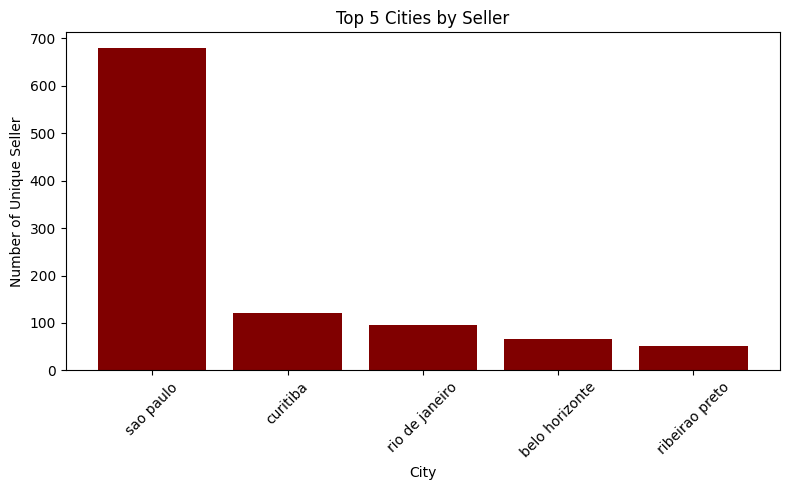

In [38]:
plt.figure(figsize=(8, 5))
plt.bar(top_seller.index, top_seller.values, color='maroon')
plt.title('Top 5 Cities by Seller')
plt.xlabel('City')
plt.ylabel('Number of Unique Seller')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q8. Which product category has the most items sold?

In [39]:
# Your code here
HTML('<h1 style="color: purple; font-weight: bold;">Most item solds</h1>')

# Explination

Using df['product_category_name'].value_counts().head(), i identified which product categories appear most frequently in the dataset, indicating the most popular or frequently listed categories.



In [40]:
# Your code here
df['product_category_name'].value_counts().head()

product_category_name
cama_mesa_banho           11847
beleza_saude               9944
esporte_lazer              8942
moveis_decoracao           8743
informatica_acessorios     8105
Name: count, dtype: int64

### Q9. What is the average order value (`payment_value`) per order?

In [41]:
# Your code here
HTML('<h1 style="color: purple; font-weight: bold;"> average order value (payment_value) per order</h1>')

#Explanation
You grouped data by order_id, summed the payment_value per order, and then took the mean across orders, arriving at an overall average order value of approximately 206.49.


In [42]:
# Your code here
df.groupby('order_id')['payment_value'].sum().mean()

206.48941626258858

### Q10. How many unique customers and unique sellers are there?

In [43]:
# Your code here
HTML('<h1 style="color: purple; font-weight: bold;">Unique cutomers and sellers</h1>')

Counting distinct customer_id and seller_id (96,516 and 3,028 respectively) quantified the overall size of your customer base and seller network in the dataset.


In [44]:
# Your code here
unique_customers = df['customer_id'].nunique()
unique_sellers = df['seller_id'].nunique()
print(unique_customers,'\n',unique_sellers)

96516 
 3028


### Q11. What are the average, minimum, and maximum values for `freight_value` and `payment_value`?

In [45]:
# Your code here
HTML('<h1 style="color: grey; font-weight: bold;"> average, minimum, and maximum values for freight_value and payment_value</h1>')

i calculated min/max for freight (0.0–409.68) and payment (0.0–13,664.08), plotted histograms with Matplotlib, and overlaid mean lines to visualize distribution and central tendency for these transaction metrics.


In [46]:
# Your code here
print("Freight Value")
print("Min:", df['freight_value'].min())
print("Max:", df['freight_value'].max())


Freight Value
Min: 0.0
Max: 409.68


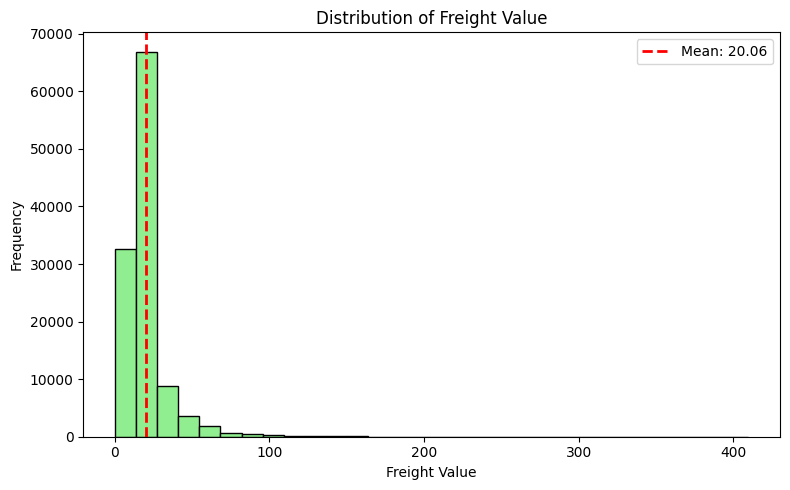

In [47]:
mean_value = df['freight_value'].mean()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['freight_value'], bins=30, color='lightgreen', edgecolor='black')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
print("\nPayment Value")
print("Min:", df['payment_value'].min())
print("Max:", df['payment_value'].max())


Payment Value
Min: 0.0
Max: 13664.08


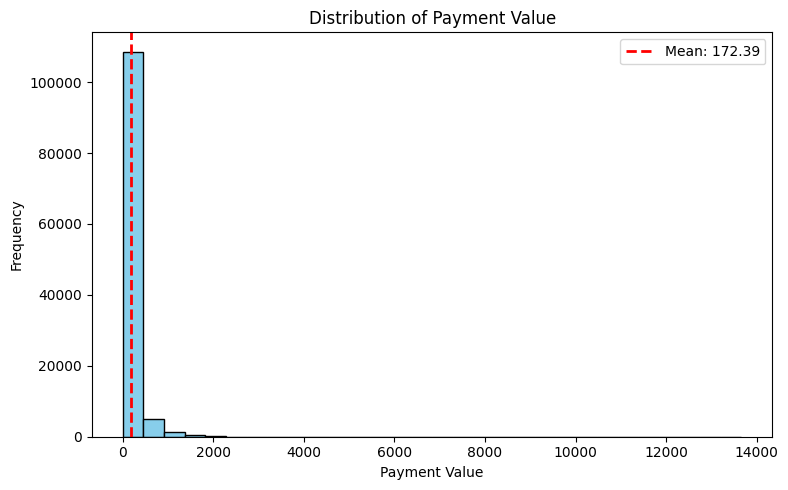

In [49]:
payment_mean = df['payment_value'].mean()

# Plot histogram with mean line
plt.figure(figsize=(8, 5))
plt.hist(df['payment_value'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(payment_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {payment_mean:.2f}')
plt.title('Distribution of Payment Value')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


### Q12. Which customers made the most purchases (top 5)?

In [50]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;"> most purchases (top 5)</h1>')

By running df['customer_id'].value_counts().head(), i identified the customers who made the most orders. This highlights high-value or frequent  customers


In [51]:

df['customer_id'].value_counts().head()

customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
63b964e79dee32a3587651701a2b8dbf    24
Name: count, dtype: int64

### Q13. What's the average time between order purchase and delivery?

In [52]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">average time between order purchase and delivery</h1>')

In [53]:
# Your code here
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['delivery_time'].mean()

Timedelta('12 days 10:36:41.583178015')

### Q14. What's the average number of installments for payments?

In [54]:
# Your code here
HTML('<h1 style="color: skyblue; font-weight: bold;">average Installment</h1>')

Examining unique values and calculating .mean() showed that customers take on average about 2.95 installments for payments, giving insight into payment behavior.


In [55]:
# Your code here
df['payment_installments'].unique()

array([ 2,  8,  7,  1,  3, 10,  5,  6,  4, 12,  9, 18, 16, 15, 13, 24, 22,
       21, 20, 14,  0, 17, 11, 23])

In [56]:
df['payment_installments'].value_counts()

payment_installments
1     57599
2     13404
3     11551
4      7855
10     6785
5      5928
8      5013
6      4546
7      1789
9       710
12      164
15       91
18       38
24       34
11       22
20       20
13       19
14       16
17        7
16        7
21        6
0         3
22        1
23        1
Name: count, dtype: int64

In [57]:
df['payment_installments'].mean()

2.9462325597488084

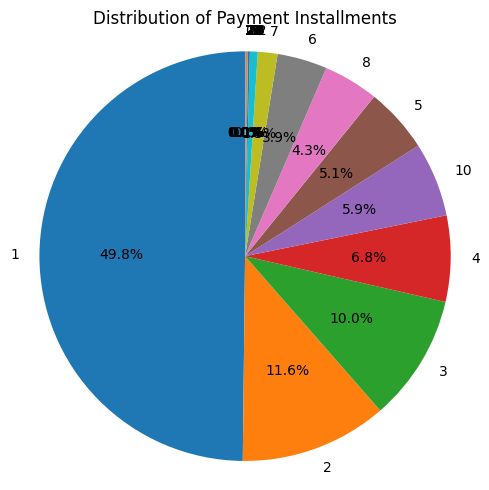

In [58]:
installment_counts = df['payment_installments'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(installment_counts, labels=installment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Installments')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

### Q15. How many returning customers are there? (Using `customer_unique_id`)

In [59]:
# Your code here
HTML('<h1 style="color: skyblue; font-weight: bold;">Returning customer</h1>')

Filtering customer_unique_id counts greater than one gave you 14,019 returning customers, revealing shopper interest and repeat purchase behavior.

In [60]:

(df['customer_unique_id'].value_counts()>1).sum()

14019

In [61]:

(df['customer_unique_id'].value_counts()==1).sum()

79377

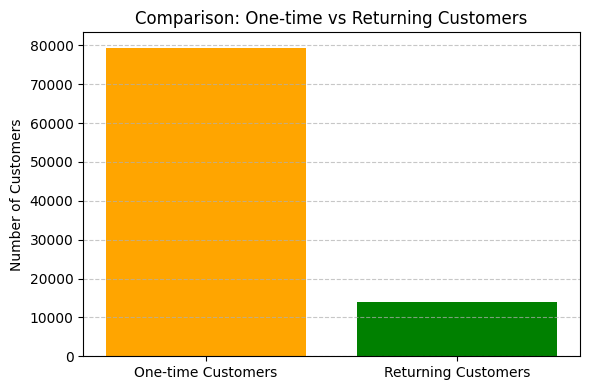

In [62]:
customer_counts = df['customer_unique_id'].value_counts()
returning = (customer_counts > 1).sum()
one_time = (customer_counts == 1).sum()
labels = ['One-time Customers', 'Returning Customers']
values = [one_time, returning]
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['orange', 'green'])

plt.ylabel('Number of Customers')
plt.title('Comparison: One-time vs Returning Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Q16. What's the average product rating (`review_score`) by customer?

In [63]:
# Your code here
HTML('<h1 style="color: skyblue; font-weight: bold;">Average product rate</h1>')

In [64]:
# Your code here
avg_scores =df.groupby('customer_id')['review_score'].mean()


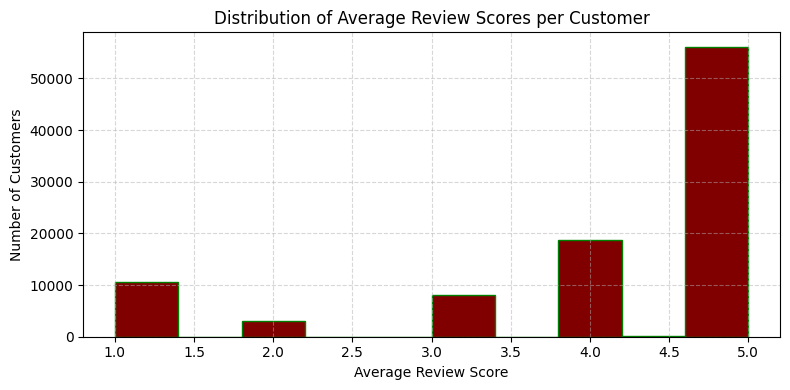

In [65]:
plt.figure(figsize=(8, 4))
plt.hist(avg_scores, bins=10, color='maroon', edgecolor='green')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Review Scores per Customer')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

i grouped by customer_id and averaged review_score to explore how different customers rate their experiences, which could help identify consistent rater profiles.

### Q17. What are the most popular products (by `product_id`)?

Using .value_counts() on product_id, i found the top-selling products—those most frequently purchased

In [66]:
# Your code here# Your code here
df['product_id'].value_counts().head()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    533
99a4788cb24856965c36a24e339b6058    517
422879e10f46682990de24d770e7f83d    507
389d119b48cf3043d311335e499d9c6b    405
368c6c730842d78016ad823897a372db    395
Name: count, dtype: int64

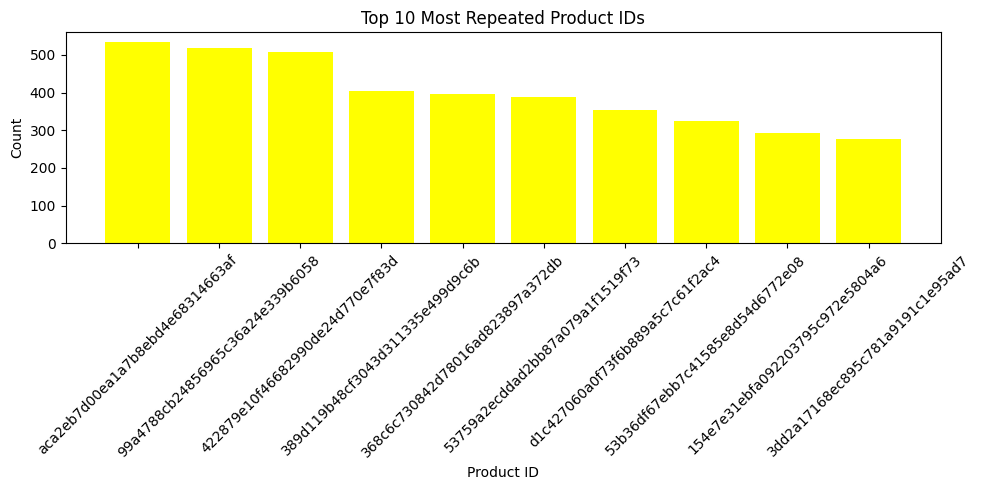

In [67]:
top_products = df['product_id'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(top_products.index, top_products.values, color='yellow')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Top 10 Most Repeated Product IDs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q18. What product categories have the highest review scores?

In [68]:
# Your code here
HTML('<h1 style="color: skyblue; font-weight: bold;">HIghest review scoret</h1>')

Grouping by product_category_name and calculating mean review_score helped assess which product categories receive better or worse customer satisfaction.

In [69]:
# Your code here
df.groupby('product_category_name')['review_score'].mean().head()

product_category_name
agro_industria_e_comercio    4.150794
alimentos                    4.228963
alimentos_bebidas            4.324138
artes                        3.935484
artes_e_artesanato           4.125000
Name: review_score, dtype: float64

### Q19. Which products have the longest delivery times?

In [70]:
# Your code here
HTML('<h1 style="color: skyblue; font-weight: bold;">Longest delivery time</h1>')

Sorting the delivery_time column in descending order revealed orders with the longest delays, pinpointing extreme delivery issues that may require investigation

In [71]:
# Your code here
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['delivery_time'].sort_values(ascending=False).head()

82239   208 days 08:26:32
4209    195 days 15:12:59
82979   194 days 20:24:15
25422   194 days 15:12:24
65886   194 days 01:11:24
Name: delivery_time, dtype: timedelta64[ns]

### Q20. What is the average product price and freight cost per category?

In [72]:
# Your code here
HTML('<h1 style="color: skyblue; font-weight: bold;">Average</h1>')

In [73]:
# Your code here
df.groupby('product_category_name')[['price', 'freight_value']].mean()

,price,freight_value
product_category_name,,
agro_industria_e_comercio,332.706151,27.646111
alimentos,58.045871,14.357965
alimentos_bebidas,56.653517,16.432172
artes,113.166221,19.144562
artes_e_artesanato,75.583750,15.422083
...,...,...
sinalizacao_e_seguranca,107.610704,32.702111
tablets_impressao_imagem,80.239176,14.856118
telefonia,71.574772,15.733348


### Q21. Which sellers have the most sales?

Grouping by category and averaging both price and freight_value provided insights into product cost structures and shipping expenses across categories.




In [74]:
HTML('<h1 style="color: pruple, font-weight: bold;">More sales</h1>')

In [75]:
# Your code here
df['seller_id'].value_counts().head()

seller_id
4a3ca9315b744ce9f8e9374361493884    2128
6560211a19b47992c3666cc44a7e94c0    2111
1f50f920176fa81dab994f9023523100    2009
cc419e0650a3c5ba77189a1882b7556a    1885
da8622b14eb17ae2831f4ac5b9dab84a    1656
Name: count, dtype: int64

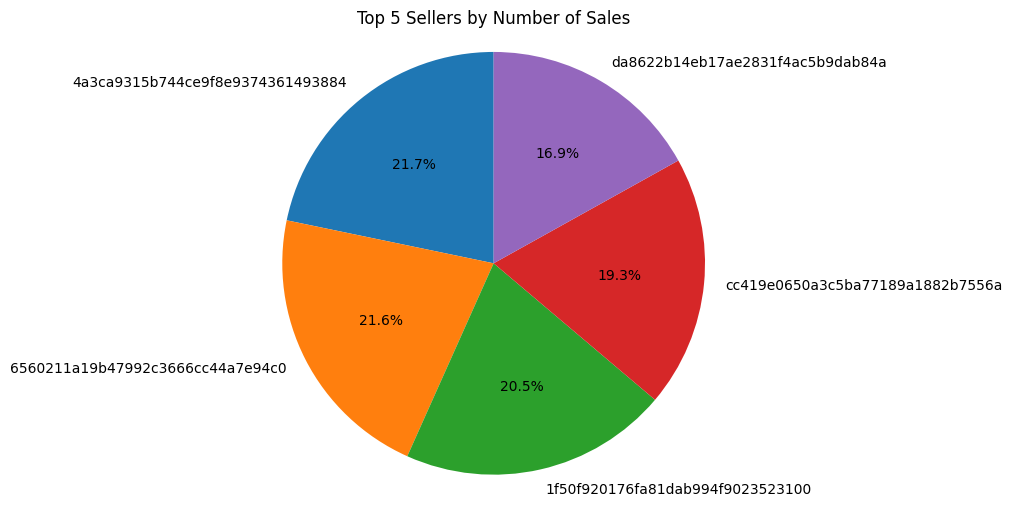

In [76]:
top_sellers = df['seller_id'].value_counts().head(5)
plt.figure(figsize=(6, 6))
plt.pie(top_sellers, labels=top_sellers.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Sellers by Number of Sales')
plt.axis('equal')
plt.show()


### Q22. Which product categories have the highest return or low ratings?

In [77]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">product categories have the highest return or low ratings</h1>')

In [78]:
# Your code here
# Highest return rate categories
print(df[df['order_status'] == 'canceled'].groupby('product_category_name')['order_id'].count() / df.groupby('product_category_name')['order_id'].count())

# Lowest average rating categories
print(df.groupby('product_category_name')['review_score'].mean().sort_values().head(10))

product_category_name
agro_industria_e_comercio         NaN
alimentos                    0.001957
alimentos_bebidas            0.003448
artes                        0.004608
artes_e_artesanato                NaN
                               ...   
sinalizacao_e_seguranca           NaN
tablets_impressao_imagem          NaN
telefonia                    0.003623
telefonia_fixa               0.014870
utilidades_domesticas        0.007775
Name: order_id, Length: 71, dtype: float64
product_category_name
seguros_e_servicos           2.500000
fraldas_higiene              3.256410
moveis_escritorio            3.526791
fashion_roupa_masculina      3.548611
casa_conforto_2              3.642857
telefonia_fixa               3.672862
fashion_roupa_feminina       3.780000
moveis_colchao_e_estofado    3.804878
audio                        3.840849
moveis_quarto                3.841270
Name: review_score, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Q23. How many orders are made per month/year?

In [79]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">orders are made per month/year</h1>')


Extracting year and month from purchase timestamps, you counted monthly and yearly order volumes, plotted them, and investigated seasonal trends like holiday spikes or slow months.



In [80]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year

orders_per_year = df['order_year'].value_counts().sort_index()
print("Orders per Year:")
print(orders_per_year)


Orders per Year:
order_year
2016      381
2017    52507
2018    62721
Name: count, dtype: int64


In [81]:
# Extract order month in 'YYYY-MM' format
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
orders_per_month = df['order_month'].value_counts().sort_index()
print("Orders per Month:")
print(orders_per_month)


Orders per Month:
order_month
2016-09       3
2016-10     377
2016-12       1
2017-01     998
2017-02    1999
2017-03    3109
2017-04    2760
2017-05    4300
2017-06    3728
2017-07    4773
2017-08    5083
2017-09    5014
2017-10    5491
2017-11    8881
2017-12    6371
2018-01    8304
2018-02    7817
2018-03    8380
2018-04    8123
2018-05    8127
2018-06    7331
2018-07    7242
2018-08    7396
2018-09       1
Freq: M, Name: count, dtype: int64


### Q24. Is there any seasonality in order volume?

In [82]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">Sesonality</h1>')

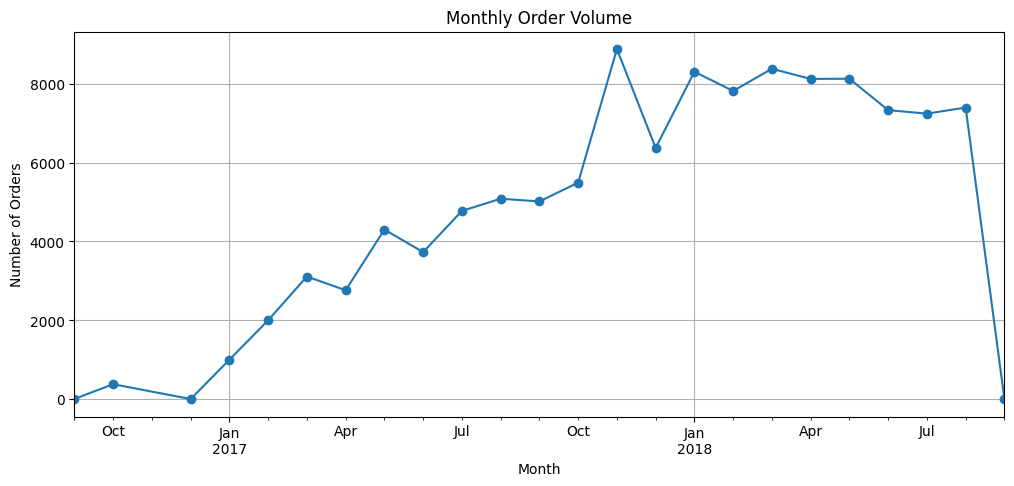

In [83]:
# Your code here
import matplotlib.pyplot as plt

# Ensure 'order_month' is extracted
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = df['order_month'].value_counts().sort_index()

# Plot
monthly_orders.plot(kind='line', marker='o', figsize=(12, 5), title="Monthly Order Volume")
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

The line graph titled "Monthly Order Volume" presents a clear picture of order trends from October 2016 to August 2018. Initially, order volume increased steadily, showing consistent growth through late 2017 and early 2018, peaking in November 2017. This was followed by a stable high-performance phase, until a dramatic decline in August 2018, where the volume dropped sharply to its lowest point. This drop could indicate operational, market, or external issues that disrupted performance.

### Q25. What's the trend of review scores over time?

In [84]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">Customer Satisfaction</h1>')

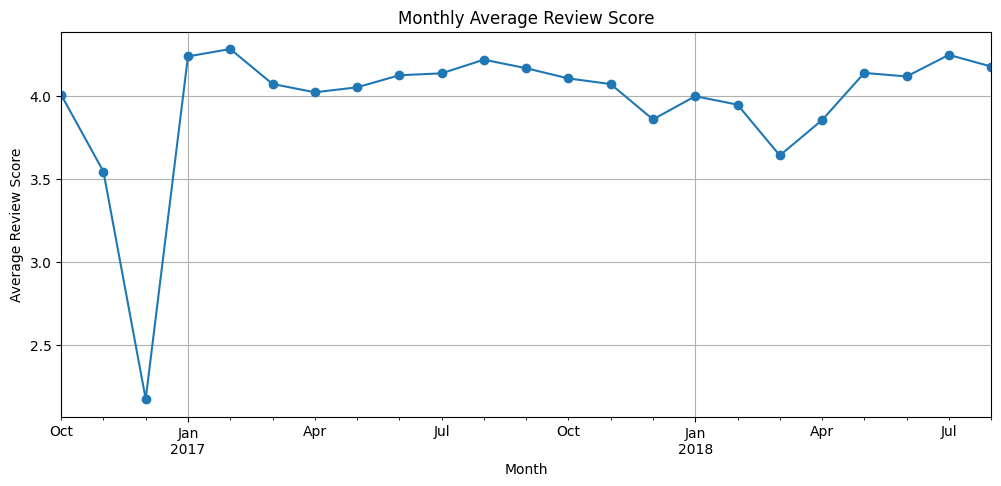

In [85]:
# Your code here
df['review_month'] = df['review_creation_date'].dt.to_period('M')
monthly_avg_score = df.groupby('review_month')['review_score'].mean()

monthly_avg_score.plot(kind='line', marker='o', figsize=(12, 5), title="Monthly Average Review Score")
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()


The graph titled "Monthly Average Review Score" depicts average customer satisfaction over the same period. It began with a sharp decline in December 2016 but recovered quickly to maintain consistently high scores throughout 2017. However, starting from late 2017, the graph shows more frequent fluctuations and a slight downward trend, suggesting challenges in sustaining customer satisfaction. The scores, though, mostly remained above 3.5.



### Q26. What is the average shipping delay (actual - estimated delivery)?

In [86]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">Average shipping delay</h1>')

In [87]:
# Your code here
df['shipping_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
avg_delay = df['shipping_delay'].mean()
print(f"Average Shipping Delay (in days): {avg_delay}")


Average Shipping Delay (in days): -12.092351314824793


Calculating order_delivered_customer_date – order_estimated_delivery_date produced an average shipping delay (negative values suggest early delivery), offering insight into delivery reliability

### Q27. How long does each step in the order process take (e.g., purchase → approval → delivery)?

In [88]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">Process</h1>')

In [89]:
# Your code here
df['purchase_to_approved'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days
df['approved_to_delivered'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days
df['delivered_to_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

print("Average time (in days):")
print("Purchase to Approval:", df['purchase_to_approved'].mean())
print("Approval to Delivery:", df['approved_to_delivered'].mean())
print("Delivery to Estimated:", df['delivered_to_estimated'].mean())

Average time (in days):
Purchase to Approval: 0.27161209394870023
Approval to Delivery: 11.51930738990238
Delivery to Estimated: 11.092351314824793


By computing intervals for purchase → approval, approval → delivery, and delivery → estimated date,we quantified time spent at each step, which is essential for process optimization.

### Q28. What is the distribution of payment types?

In [90]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">Distributionn of payment types</h1>')

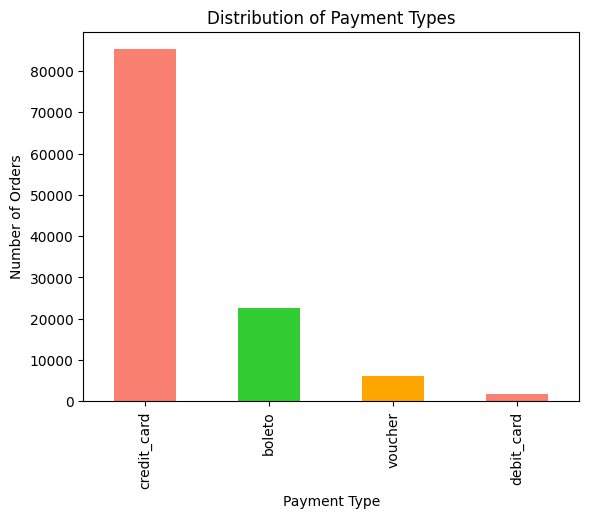

In [91]:
# Your code here
import matplotlib.pyplot as plt

payment_counts = df['payment_type'].value_counts()
colors = [ 'salmon', 'limegreen', 'orange']

payment_counts.plot(kind='bar', color=colors, title="Distribution of Payment Types")
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.show()

plotting counts of payment_type values revealed the most popular payment methods (e.g., credit card vs boleto), reflecting consumer preferences or payment defaults.

### Q29. Which payment type has the highest average payment value?

In [92]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">Higest averaege pagemnet values</h1>')

In [93]:
# Your code here
avg_payment_by_type = df.groupby('payment_type')['payment_value'].mean()
avg_payment_by_type.sort_values(ascending=False)

payment_type
credit_card    179.421424
boleto         176.950041
debit_card     150.403080
voucher         64.292139
Name: payment_value, dtype: float64

### Q30. How many customers pay in a single installment vs multiple?

In [94]:
# Your code here
HTML('<h1 style="color: green; font-weight: bold;">Single installment vs multiple installment</h1>')

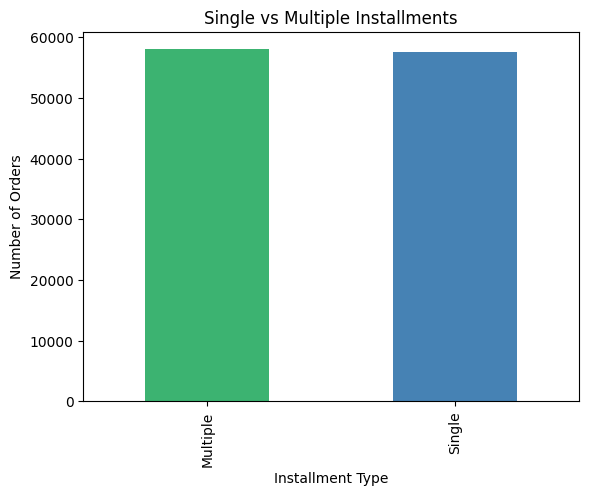

In [95]:
# Your code here
single_vs_multiple = df['payment_installments'].apply(lambda x: 'Single' if x == 1 else 'Multiple').value_counts()
single_vs_multiple.plot(kind='bar', color=['mediumseagreen', 'steelblue'], title="Single vs Multiple Installments")

plt.xlabel('Installment Type')
plt.ylabel('Number of Orders')
plt.show()


This code creates a bar chart comparing the number of orders paid in single vs. multiple installments